# 프로젝트: 고양이 수염 스티커 만들기

In [1]:
import cv2
import dlib

import matplotlib.pyplot as plt
import os
import numpy as np
import copy
print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


## Step 1. 스티커 구하기 or 만들기

In [2]:
img_path = '/aiffel/aiffel/camera_sticker/images/share.png' 
img_bgr = cv2.imread(img_path)
img_show = img_bgr.copy()

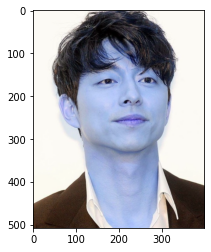

In [3]:
# print(img_show.shape)
plt.imshow(img_bgr)
plt.show()

(508, 400, 3)


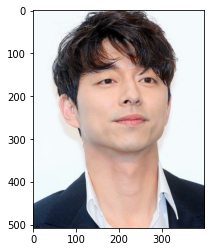

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

#### flag 값에 따른 이미지의 출력

(508, 400, 3)


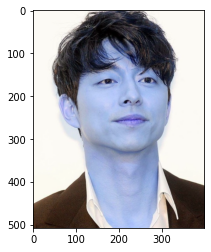

In [5]:
original = cv2.imread(img_path, cv2.IMREAD_COLOR)   
# 이미지 파일을 Color로 읽어들입니다. 투명한 부분은 무시되며, Default값
print(original.shape)
plt.imshow(original)
plt.show() 

(508, 400)


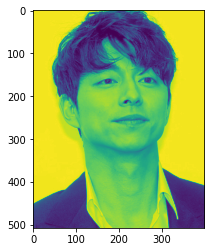

In [6]:
gray= cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
# 이미지를 Grayscale로 읽어 들입니다. 실제 이미지 처리시 중간단계로 많이 사용한다
print(gray.shape)
plt.imshow(gray)
plt.show()

(508, 400, 4)


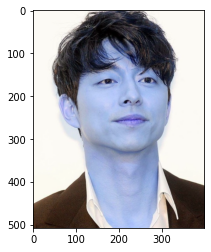

In [7]:
unchange = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
# 이미지파일을 alpha channel까지 포함하여 읽어 들인다
print(unchange.shape)
plt.imshow(unchange)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기

In [8]:
detector_hog = dlib.get_frontal_face_detector() 

In [9]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   
# (image, num of image pyramid = 이미지의 피라미드 수) 
# 이미지를 업샘플링 방법을 통해 크게 키우는게 이미지 피라미드

rectangles[[(117, 93) (340, 316)]]


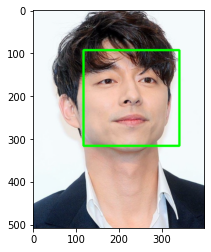

In [10]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)
    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

cv2.rectangle(img, pt1, pt2, color, thickness, lineType, shift)

->

img : 이미지 파일 

pt1 : 시작점 좌표(x,y)

pt2 : 종료점 좌표(x,y)

color : 색상 (g,b,r)******************

thickness : 선두께 default 1

lineType  : 선종류 default cv.Line_8

shift : fractional bit. default 0, 그리기 좌표값의 축소 비율 

In [11]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
   
landmark_predictor = dlib.shape_predictor(model_path)

In [12]:
list_landmarks = []
# 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아낸다
# face landmark 좌표를 저장
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
        
print(len(list_landmarks[0]))

68


#### 얼굴 영역에 mark 나타내기

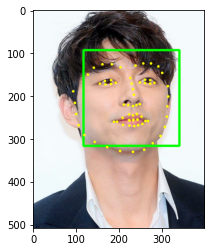

In [13]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 3, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

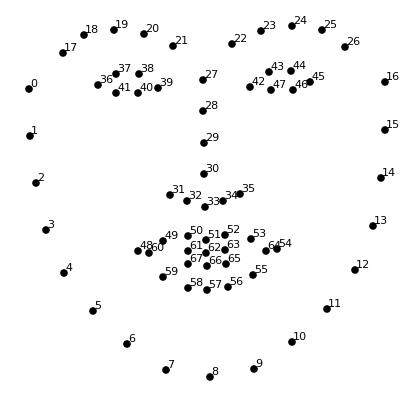

rectangles[[(117, 93) (340, 316)]]

In [14]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(dlib_rects) # 얼굴 영역을 저장하고있는 값
    print(list_landmarks) # 이목구비 위치 좌표
    print(f'dlib_rect.height : ',dlib_rect.height())
    print(f'dlib_rect.width : ',dlib_rect.width())
          
    print (f"nose index(코의 위치) :",landmark[30]) # 코의 index는 30 
    x = landmark[30][0] 
    # 이미지에서 코 부위의 x값
    print(f'x: ',x)
    
    y = landmark[30][1] - dlib_rect.height() //2  
    # 이미지에서 코 부위의 y 값
    # 얼굴 영역의 세로를 차지하는 픽셀 수 //2
    # 197 - (224+1) //2 
    print(197 - (224+1) //2 ) # 85
    print(f'y: ',y)
    
    w = h = dlib_rect.width() 
    # 얼굴 영역의 가로를 차지하는 픽셀 수
    # (max(x) - min(x) +1 )
    # 340 - 117 +1 
    # +1 을 해주는 이유는 픽셀수는 점하나로도 1이되기 때문
    print(340 - 117 +1)
    
    print()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

rectangles[[(117, 93) (340, 316)]]
[[(93, 189), (97, 216), (100, 242), (106, 268), (119, 291), (143, 307), (172, 319), (202, 328), (232, 330), (258, 325), (278, 310), (296, 293), (306, 272), (311, 248), (312, 224), (314, 201), (313, 177), (127, 150), (141, 134), (161, 126), (183, 126), (203, 133), (238, 129), (256, 124), (274, 124), (291, 131), (300, 146), (226, 158), (229, 171), (232, 184), (234, 197), (211, 220), (221, 221), (232, 223), (240, 221), (248, 219), (155, 171), (167, 165), (181, 163), (192, 169), (181, 172), (168, 173), (248, 168), (260, 162), (272, 163), (282, 169), (272, 171), (260, 170), (188, 260), (208, 251), (223, 243), (232, 245), (241, 242), (252, 248), (267, 258), (254, 265), (244, 268), (235, 270), (224, 269), (209, 267), (195, 260), (223, 256), (233, 255), (242, 255), (261, 258), (243, 255), (233, 257), (224, 257)]]
dlib_rect.height :  224
dlib_rect.width :  224
nose index(코의 위치) : (234, 197)
x:  234
85
y:  85
224

(x,y) : (234,85)
(w,h) : (224,224)


#### 코의 중점 (234, 197) 로 나온것을 확인했다

#### 고양이 수염 불러오기

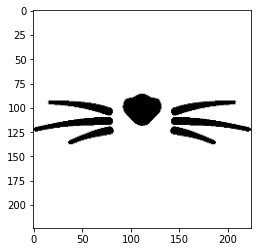

(224, 224, 3)


In [15]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
# w,h는 얼굴 영역의 가로를 차지하는 픽셀 수 224
# cv2.resize(image객체 행렬, (가로 길이, 세로 길이))


plt.imshow(img_sticker)
plt.show()

print (img_sticker.shape) 

In [16]:
refined_x = x - w // 2 
# 234 - 224 //2 
print(234- 224 //2)

# refined_y = y - h
# 85 - 224
# print(85-224)
refined_y = y  


# 이미지 시작점은 top-left 좌표.
# 즉, refined_x, refined_y값에서 t수염이미지 시작

print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 

122
(x,y) : (122,85)


x 는 코의 x값 : 234

y 는 코의 y값 : 85

w 얼굴 영역의 가로를 차지하는 픽셀의 수 224

h 얼굴 영역의 가로를 차지하는 픽셀의 수 224

## Step 4. 스티커 적용하기

In [17]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

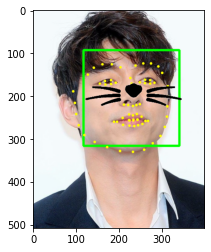

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 고양이 수염을 적용했지만, 위치가 살짝 맞지 않은 느낌이라 아쉽다

#### img_sticker==255 가 무엇을의미하는지?

#### 255(하얀색)인것은 사용하지 않겠다? 라고 생각

#### 수염 좌표를 조정한뒤, 적용해보기

In [19]:
refined_x = x - w //2 -4
refined_y = y + 9


# 이미지 시작점은 top-left 좌표.
# 즉, refined_x, refined_y값에서 t수염이미지 시작

print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 

(x,y) : (118,94)


In [20]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

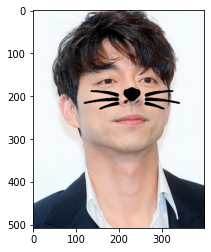

In [21]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 고양이 수염을 덮어 씌운 이미지가 나오게 된다.
plt.show()

#### 좌표값을 변경해주니 얼굴위치에 잘 맞게 수염이 씌워졌다

## Step 5. 문제점 찾아보기

### 다양한 사진으로 적용해보기

In [22]:
img2_path = '/aiffel/aiffel/camera_sticker/images/share2.png' 
img2_bgr = cv2.imread(img2_path)
img2_show = img2_bgr.copy()

(796, 600, 3)


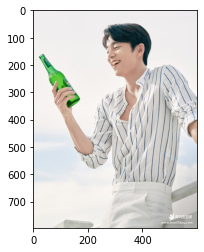

In [23]:
img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
print(img2_rgb.shape)
plt.imshow(img2_rgb)
plt.show()

rectangles[]


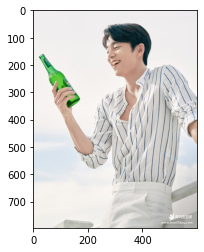

In [24]:
detector2_hog = dlib.get_frontal_face_detector() 

img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
dlib2_rects = detector2_hog(img2_rgb, 1) 

print(dlib2_rects)   

for dlib_rect in dlib2_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img2_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)
    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img2_show_rgb =  cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB)
plt.imshow(img2_show_rgb)
plt.show()

#### 아? rectangles[]

#### 해당사진의 경우, 너무 측면 얼굴이라 얼굴 영역을 찾지 못한것같다

#### 다른사진으로 시도해보기

In [25]:
img3_path = '/aiffel/aiffel/camera_sticker/images/share3.png' 
img_bgr = cv2.imread(img3_path)
img_show = img_bgr.copy()

(531, 800, 3)


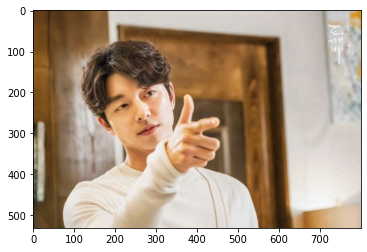

In [26]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

rectangles[[(180, 160) (366, 345)]]


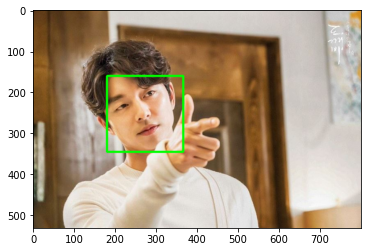

In [27]:
detector3_hog = dlib.get_frontal_face_detector() 

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib3_rects = detector3_hog(img_rgb, 1) 

print(dlib3_rects)   

for dlib_rect in dlib3_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)
    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

68


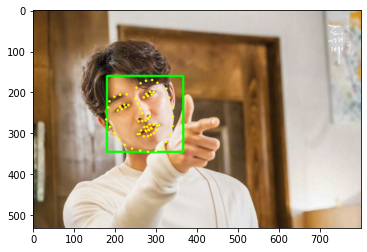

In [28]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
   
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
   
for dlib_rect in dlib3_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
        
print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 3, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 살짝 기울어진 얼굴 영역을 잘 가져오는 것을 확인

In [29]:
for dlib_rect, landmark in zip(dlib3_rects, list_landmarks):
    print(dlib_rects) # 얼굴 영역을 저장하고있는 값
    print(list_landmarks) # 이목구비 위치 좌표
    print(f'dlib_rect.height : ',dlib_rect.height())
    print(f'dlib_rect.width : ',dlib_rect.width())
          
    print (f"nose index(코의 위치) :",landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] 
    # 이미지에서 코 부위의 x값
    print(f'x: ',x)
    
    y = landmark[30][1] - dlib_rect.height() //2  
    # 이미지에서 코 부위의 y 값.
    # 얼굴 영역의 세로를 차지하는 픽셀 수 //2
    print(f'y: ',y)
    
    w = h = dlib_rect.width() 
    # 얼굴 영역의 가로를 차지하는 픽셀 수
    # (max(x) - min(x) +1 )
    
    print()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

rectangles[[(117, 93) (340, 316)]]
[[(178, 266), (187, 284), (198, 300), (210, 315), (223, 328), (241, 337), (261, 342), (280, 345), (299, 343), (314, 335), (324, 321), (334, 303), (340, 282), (341, 259), (338, 236), (332, 213), (325, 191), (183, 237), (186, 222), (198, 211), (212, 206), (228, 205), (252, 189), (262, 178), (275, 172), (290, 170), (303, 177), (250, 215), (255, 227), (261, 239), (266, 251), (257, 271), (266, 270), (274, 269), (279, 264), (284, 259), (206, 244), (212, 235), (222, 230), (232, 231), (225, 236), (216, 241), (270, 212), (276, 204), (285, 199), (294, 199), (289, 205), (280, 209), (255, 302), (263, 293), (271, 285), (278, 284), (284, 278), (294, 279), (307, 280), (300, 291), (294, 299), (287, 303), (280, 306), (270, 307), (260, 301), (274, 293), (281, 291), (287, 287), (302, 282), (289, 288), (283, 292), (276, 295)]]
dlib_rect.height :  186
dlib_rect.width :  187
nose index(코의 위치) : (266, 251)
x:  266
y:  158

(x,y) : (266,158)
(w,h) : (187,187)


In [30]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h)) 
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)
print (img_sticker.shape) 

(187, 187, 3)


In [31]:
refined_x = x - w // 2 
refined_y = y  

# 이미지 시작점은 top-left 좌표.
# 즉, refined_x, refined_y값에서 수염이미지 시작

print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 

(x,y) : (173,158)


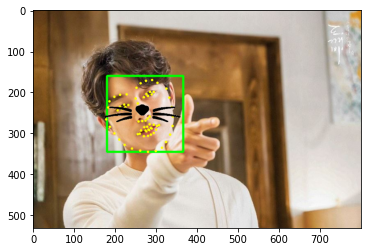

In [32]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

#### 얼굴각도가 틀어졌는데, 수염이 그에 맞지 않게 씌워졌다

In [33]:
import math

In [34]:
print(w)
print(h)
print(x)
print(y)

187
187
266
158


(x,y) : (177,172)
고양이 수염 이미지가 기울어진 각도: 32.5


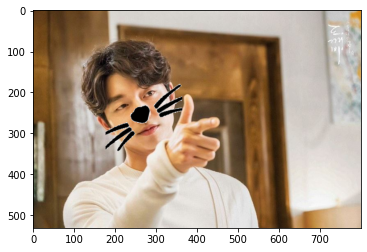

In [35]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))
img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

# 스티커의 x좌표와, y좌표
sticker_x = img_sticker.shape[0]
sticker_y = img_sticker.shape[1]
 
refined_x = x - w // 2 +4
refined_y = y  +14
print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 

# 스티커가 들어갈 영역. 
sticker_area = img_bgr[refined_y:refined_y+sticker_x, refined_x:refined_x+sticker_y]


height, width, channel = img_sticker.shape
ang = math.atan(h/w)/math.pi*130
print("고양이 수염 이미지가 기울어진 각도:", ang) 

# 각도에 맞춰 스티커를 회전
# 시계 방향으로 기울어져 있으면 -를 
# 이사진의 경우 반시계 방향이라 -를 붙이지 않는다
matrix = cv2.getRotationMatrix2D((width/2, height/2), ang, 1.5) #1
img_sticker = cv2.warpAffine(img_sticker, matrix, (width, height))

img_bgr[refined_y:refined_y+sticker_x, refined_x:refined_x+sticker_y] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 기울어진 얼굴 각도에 맞게 수염이 잘 씌워졌다

#### 수트입은 아이언맨도 얼굴 인식이 될까?

(482, 472, 3)


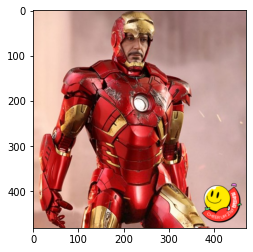

rectangles[[(185, 36) (275, 126)]]


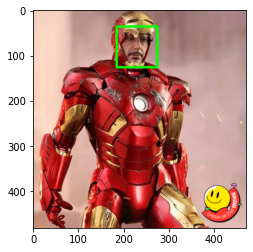

In [36]:
img2_path = '/aiffel/aiffel/camera_sticker/images/ironman.png' 
img2_bgr = cv2.imread(img2_path)
img2_show = img2_bgr.copy()
img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
print(img2_rgb.shape)
plt.imshow(img2_rgb)
plt.show()

detector2_hog = dlib.get_frontal_face_detector() 

img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
dlib2_rects = detector2_hog(img2_rgb, 1) 

print(dlib2_rects)   

for dlib_rect in dlib2_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img2_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)
    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img2_show_rgb =  cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB)
plt.imshow(img2_show_rgb)
plt.show()

#### 얼굴이 인식 안될줄 알았는데 가능했다

#### 사람들이 많고 먼 경우에는?

(607, 800, 3)


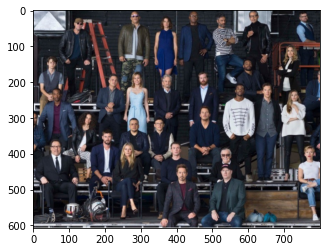

rectangles[[(397, 442) (433, 478)], [(517, 394) (553, 430)], [(357, 186) (393, 222)], [(45, 366) (81, 402)]]


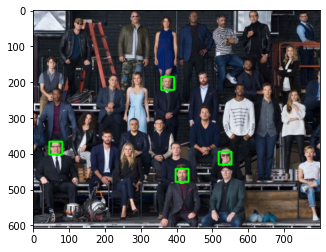

In [37]:
img2_path = '/aiffel/aiffel/camera_sticker/images/marvel.png' 
img2_bgr = cv2.imread(img2_path)
img2_show = img2_bgr.copy()
img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
print(img2_rgb.shape)
plt.imshow(img2_rgb)
plt.show()

detector2_hog = dlib.get_frontal_face_detector() 

img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)
dlib2_rects = detector2_hog(img2_rgb, 1) 

print(dlib2_rects)   

for dlib_rect in dlib2_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img2_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)
    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img2_show_rgb =  cv2.cvtColor(img2_show, cv2.COLOR_BGR2RGB)
plt.imshow(img2_show_rgb)
plt.show()

#### 사진에 나온 사람들 전부는 아니지만 일부 사람들의 얼굴영역을 찾았다.

#### 이들중엔 안경쓴 사람도 있다. 심지어 선글라스를 쓴 얼굴도 인식했다.

#### 사진이 너무 작아서 랜드마크를 찍고 스티커 이미지를 합성시켜보는것은 잘 안보일것같아 패스

#### 한번더 여러명 인식해보기

(800, 1200, 3)


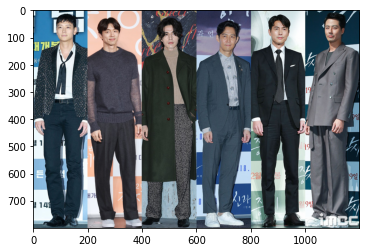

rectangles[[(875, 53) (937, 115)], [(1061, 53) (1123, 115)], [(688, 80) (750, 142)], [(259, 59) (322, 122)], [(474, 73) (536, 135)], [(87, 53) (149, 115)]]


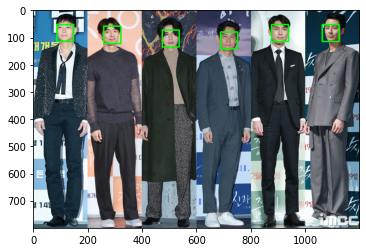

In [38]:
img_path = '/aiffel/aiffel/camera_sticker/images/actorsimage.png' 
img_bgr = cv2.imread(img_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

detector_hog = dlib.get_frontal_face_detector() 

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1) 

print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 3, lineType=cv2.LINE_AA)
    # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 이번엔 모든 사람의 얼굴을 인식했다.
#### 이전의 사진과 차이점이라면 
#### 우선 사진에서 사람들이 사진찍힌 거리가 1번이 더 멀었다.
#### 이미지 크기와 화질의 영향일수도 있을것같다.
#### 그렇다면 얼굴영역도 잘 나올까?
#### 고양이 수염까지 적용해보기

68


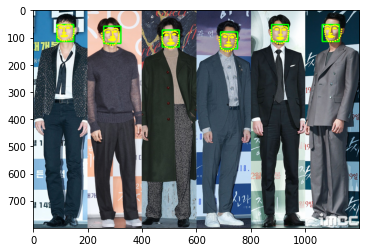

In [39]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
   
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
        
print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 3, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 사진이 작아서 그렇지 얼굴영역도 잘 나타내고있다.

dlib_rect.height :  63
dlib_rect.width :  63
nose index(코의 위치) : (909, 86)

(x,y) : (909,55)
(w,h) : (63,63)
(63, 63, 3)
(x,y) : (878,55)


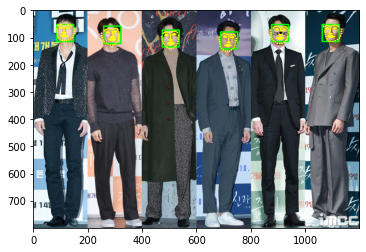

dlib_rect.height :  63
dlib_rect.width :  63
nose index(코의 위치) : (1089, 80)

(x,y) : (1089,49)
(w,h) : (63,63)
(63, 63, 3)
(x,y) : (1058,49)


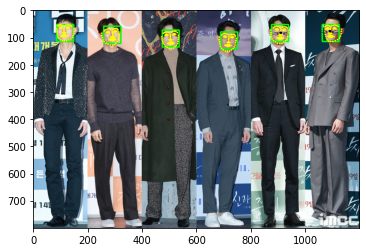

dlib_rect.height :  63
dlib_rect.width :  63
nose index(코의 위치) : (718, 114)

(x,y) : (718,83)
(w,h) : (63,63)
(63, 63, 3)
(x,y) : (687,83)


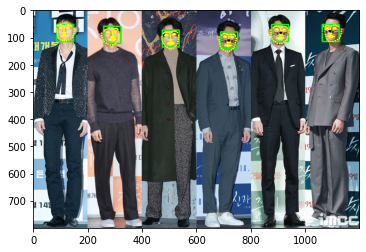

dlib_rect.height :  64
dlib_rect.width :  64
nose index(코의 위치) : (293, 93)

(x,y) : (293,61)
(w,h) : (64,64)
(64, 64, 3)
(x,y) : (261,61)


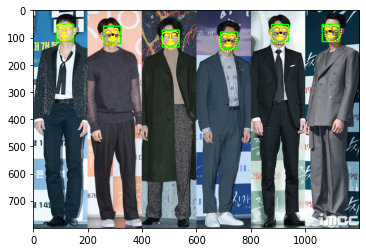

dlib_rect.height :  63
dlib_rect.width :  63
nose index(코의 위치) : (504, 104)

(x,y) : (504,73)
(w,h) : (63,63)
(63, 63, 3)
(x,y) : (473,73)


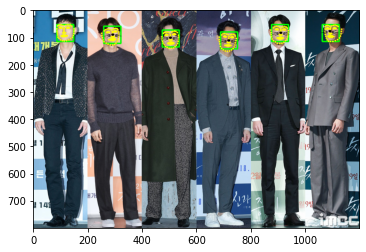

dlib_rect.height :  63
dlib_rect.width :  63
nose index(코의 위치) : (113, 78)

(x,y) : (113,47)
(w,h) : (63,63)
(63, 63, 3)
(x,y) : (82,47)


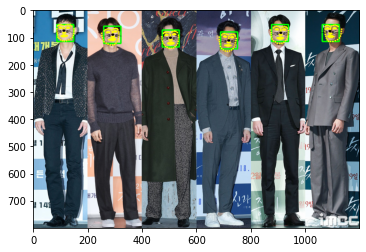


[결과출력]


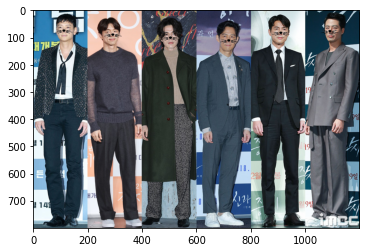

In [40]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
#     print(dlib_rects) # 얼굴 영역을 저장하고있는 값
#     print(list_landmarks) # 이목구비 위치 좌표
    print(f'dlib_rect.height : ',dlib_rect.height())
    print(f'dlib_rect.width : ',dlib_rect.width())
          
    print (f"nose index(코의 위치) :",landmark[30]) 
    x = landmark[30][0] 
    # 이미지에서 코 부위의 x값
#     print(f'x: ',x)
    
    y = landmark[30][1] - dlib_rect.height() //2  
    # 이미지에서 코 부위의 y 값.
    # 얼굴 영역의 세로를 차지하는 픽셀 수 //2
#     print(f'y: ',y)
    
    w = h = dlib_rect.width() 
    # 얼굴 영역의 가로를 차지하는 픽셀 수
    # (max(x) - min(x) +1 )
    
    
    print()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
    
    
    sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
    img_sticker = cv2.imread(sticker_path) 
    img_sticker = cv2.resize(img_sticker, (w,h)) 
    img_sticker = cv2.cvtColor(img_sticker, cv2.COLOR_BGR2RGB)

    print (img_sticker.shape) 

    refined_x = x - w // 2 
    refined_y = y  


    print ('(x,y) : (%d,%d)'%(refined_x, refined_y)) 


    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255, sticker_area,img_sticker).astype(np.uint8)

    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()


    sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

    img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

print()
print("[결과출력]")
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

#### 사진이 작아서 정확한 위치에 씌워진거인지는 잘 모르겠지만,
#### 딱 보았을때 얼굴이 보이는거 보아하니 잘 씌워진것같다.

# 회고

- 이번 프로젝트에서 **어려웠던 점,**

노드 초반에 나오는 이미지 피라미드에 대해서 이해하는게 어려웠었다.

경계선이 나온다는게 처음엔 이해하기 힘들었다.

스티커 이미지 회전이 어려웠었다.

- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.

이미지 피라미드에서 라플라시안 피라미드가

원본(a) -> 가우시안 피라미드(상위단계 - 해상도가 낮은이미지로 변경) -> 생성된이미지(b) -> 가우시안 피라미드(하위단계 - 해상도가 높은이미지로 변경) -> 생성된이미지(c) -> a와 c의 이미지를 resize해서 일치시켜주고 -> a,c 의 차이를 구하면 경계선이 나온다 는걸 알았다

참고링크 

https://dsbook.tistory.com/219

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=samsjang&logNo=220508552078

cv.rectangle에 파라미터로 shift값이있는데 그리기 좌표값의 축소 비율이 잘 이해가 가지 않았다. 값을 바꿔가면서 실험해보면 좋을 것 같다

cv2.getRotationMatrix2D(center, angle, scale) - 중앙 기준 회전

--> center : 회전 중심좌표(x,y)튜플

angle : 반시계 방향 회전 각도(degree). 음수는 시계 방향

scale : 추가적인 확대 비율

retval : 2X3 Affine 비율 변환 matrix

수염 이미지를 회전했을 때, 이미지 모서리부분이 검은색으로 나오는데 해당부분을 해결하지 못해 고민하다가 

scale값을 변경해보면서 스티커 이미지를 확대했더니 고민했던 문제가 해결되었다.


np.where(조건 True, False 위치 브로드캐스팅)

-> 첫번째 인자의 조건을 만족하면 해당위치에는 두번째인자의 연산을 브로드 캐스팅하고, 만족하지 않은 경우는 세번째 인자의 연산으로 브로드 캐스팅된다.

- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.


스티커를 정확한 위치에 합성시키기위해 좌표를 바꿔보며 시도했었고,

회전된 얼굴인경우 이에 맞게 스티커를 적용하려고 스티커 회전하는것을 시도했었다.

스티커 회전하면서 생기는 모서리를 안보이게하도록 파라미터 값을 변경해보기도했다.

다양한 사진에서 얼굴영역이 인식이 되는지 알아보기위해 사람이 많은 사진, 얼굴 각도가 많이 돌아간 사진, 얼굴이있는데 모자나 마스크 등을 착용해 얼굴인식에 방해가 되는지 등등을 확인해보려고 시도했다.


- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.낌

다양한 사진에서 얼굴영역을 인식하는지 확인하고싶었는데,

영역은 확인했으나 수염까지 모두 합성시켜보지 않은것?


- **자기 다짐**

이번 프로젝트는 이미지를 회전하는것이 어려웠었다.

이미지를 합성시키는 과정에서 자꾸 덮어씌우기가 되서 이를 해결하기위해 신경썼던것같다.

추가적으로 애니메이션에서 사람으로 그려진 캐릭터도 인식해보고 싶고, 외계인(?)우주인(?)처럼 사람의 모습과 비슷하지만 인간이 아닌 이미지로도 시도를 해보면 좋을 것 같다. 위 사진에서 선글라스를 쓴 사람의 얼굴영역을 인식했는데, 랜드마크가 찍히면서 수염이미지는 어떻게 합성할 수 있는지도 해보면 좋을 것 같다.

이미지를 회전시키는 과정에서 검색을 통해 atan을 사용하는것을 보고 적용해보았는데,

그러면서 찾아본 tan나, 각 사분면에따라서 - + 각도가 어느 방향으로 회전이 되는지도 한번 더 살펴보게되었다.

이미지를 회전하는 다른 방법을 찾아보는것도 좋을 것 같다.